# Ensemble Machine Learning Algorithms in Python with scikit-learn

> Ensembles can give you a boost in accuracy on your dataset.
> In this notebook you will discover how you can create some of the most powerful types of ensembles in Python using scikit-learn.

# Combine Model Predictions Into Ensemble Predictions

The three most popular methods for combining the predictions from different models are:

- **Bagging**. Building multiple models (typically of the same type) from different subsamples of the training dataset.
- **Boosting**. Building multiple models (typically of the same type) each of which learns to fix the prediction errors of a prior model in the chain.
- **Voting**. Building multiple models (typically of differing types) and simple statistics (like calculating the mean) are used to combine predictions.

***

A standard classification problem used to demonstrate each ensemble algorithm is the Pima Indians onset of diabetes dataset. It is a binary classification problem where all of the input variables are numeric and have differing scales.
***

# Pima Indians Diabetes Database

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have diabetes?

## 2. Features

> This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

> The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.



## Importing the libraries

In [1]:
import os
os.getcwd()

'C:\\Users\\DELL\\Documents\\College\\Semester V\\Machine Learning\\Ready Codes'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

## Loading the data

In [9]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
pd.set_option('display.float_format', '{:.2f}'.format)
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [13]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

Pregnancies : [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
Glucose : [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
BloodPressure : [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
SkinThickness : [35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8


# 1. Data visualization

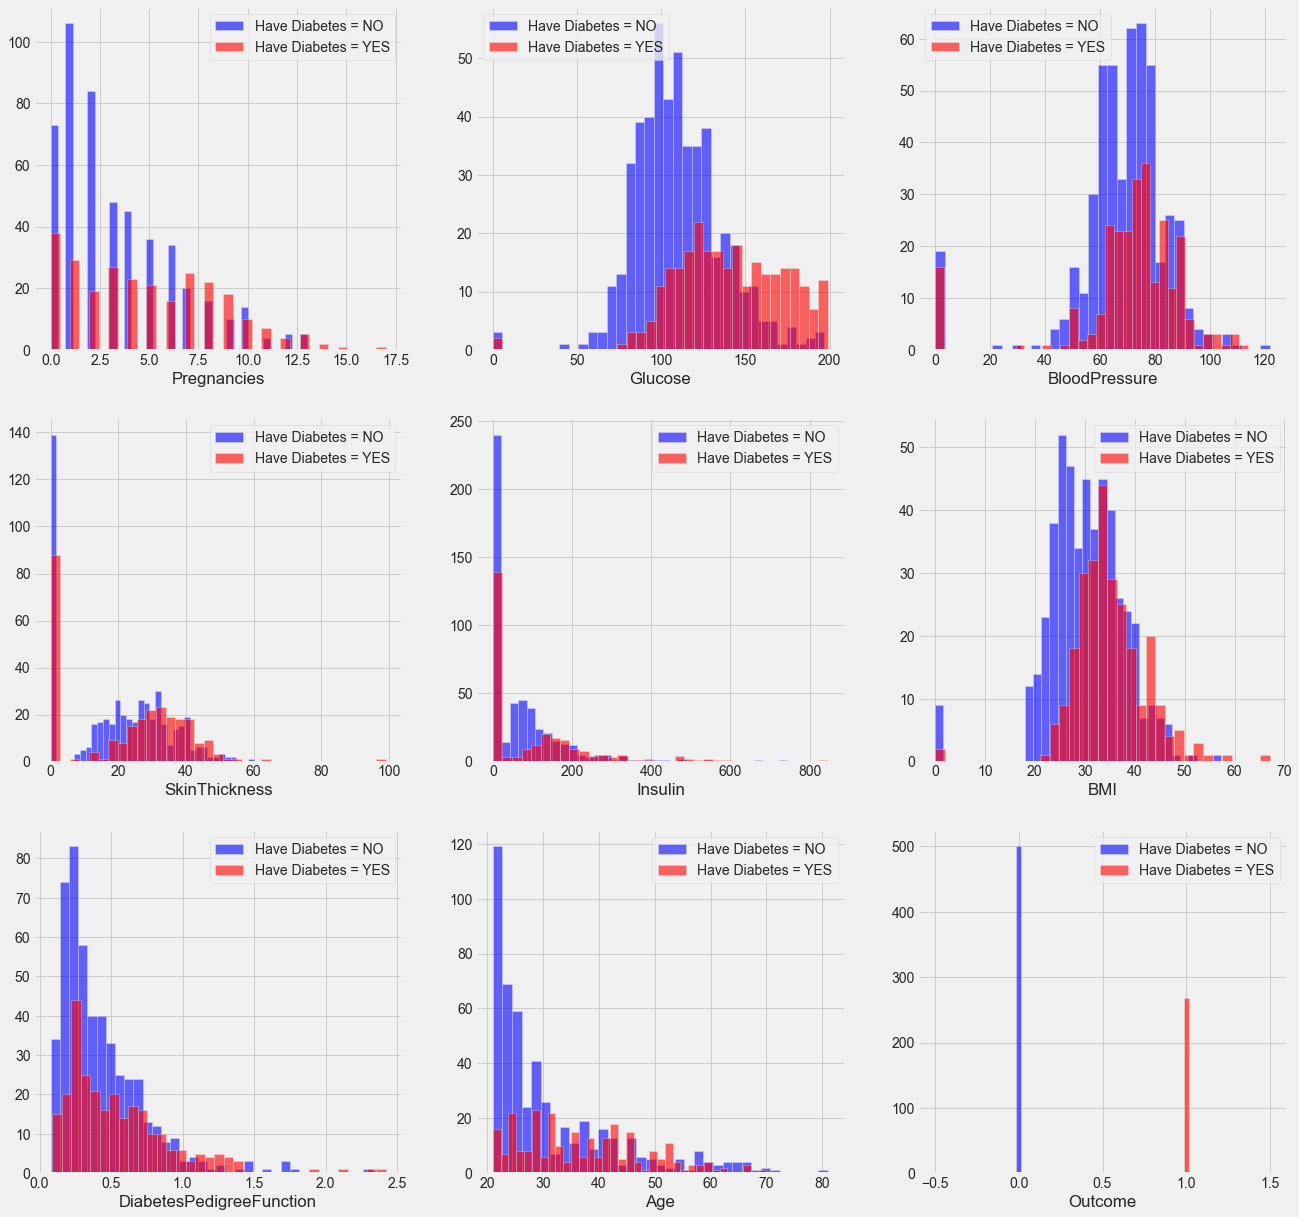

In [14]:
# Visulazing the distibution of the data for every feature
plt.figure(figsize=(20, 20))

for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    df[df["Outcome"] == 0][column].hist(bins=35, color='blue', label='Have Diabetes = NO', alpha=0.6)
    df[df["Outcome"] == 1][column].hist(bins=35, color='red', label='Have Diabetes = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

<Figure size 2160x2160 with 0 Axes>

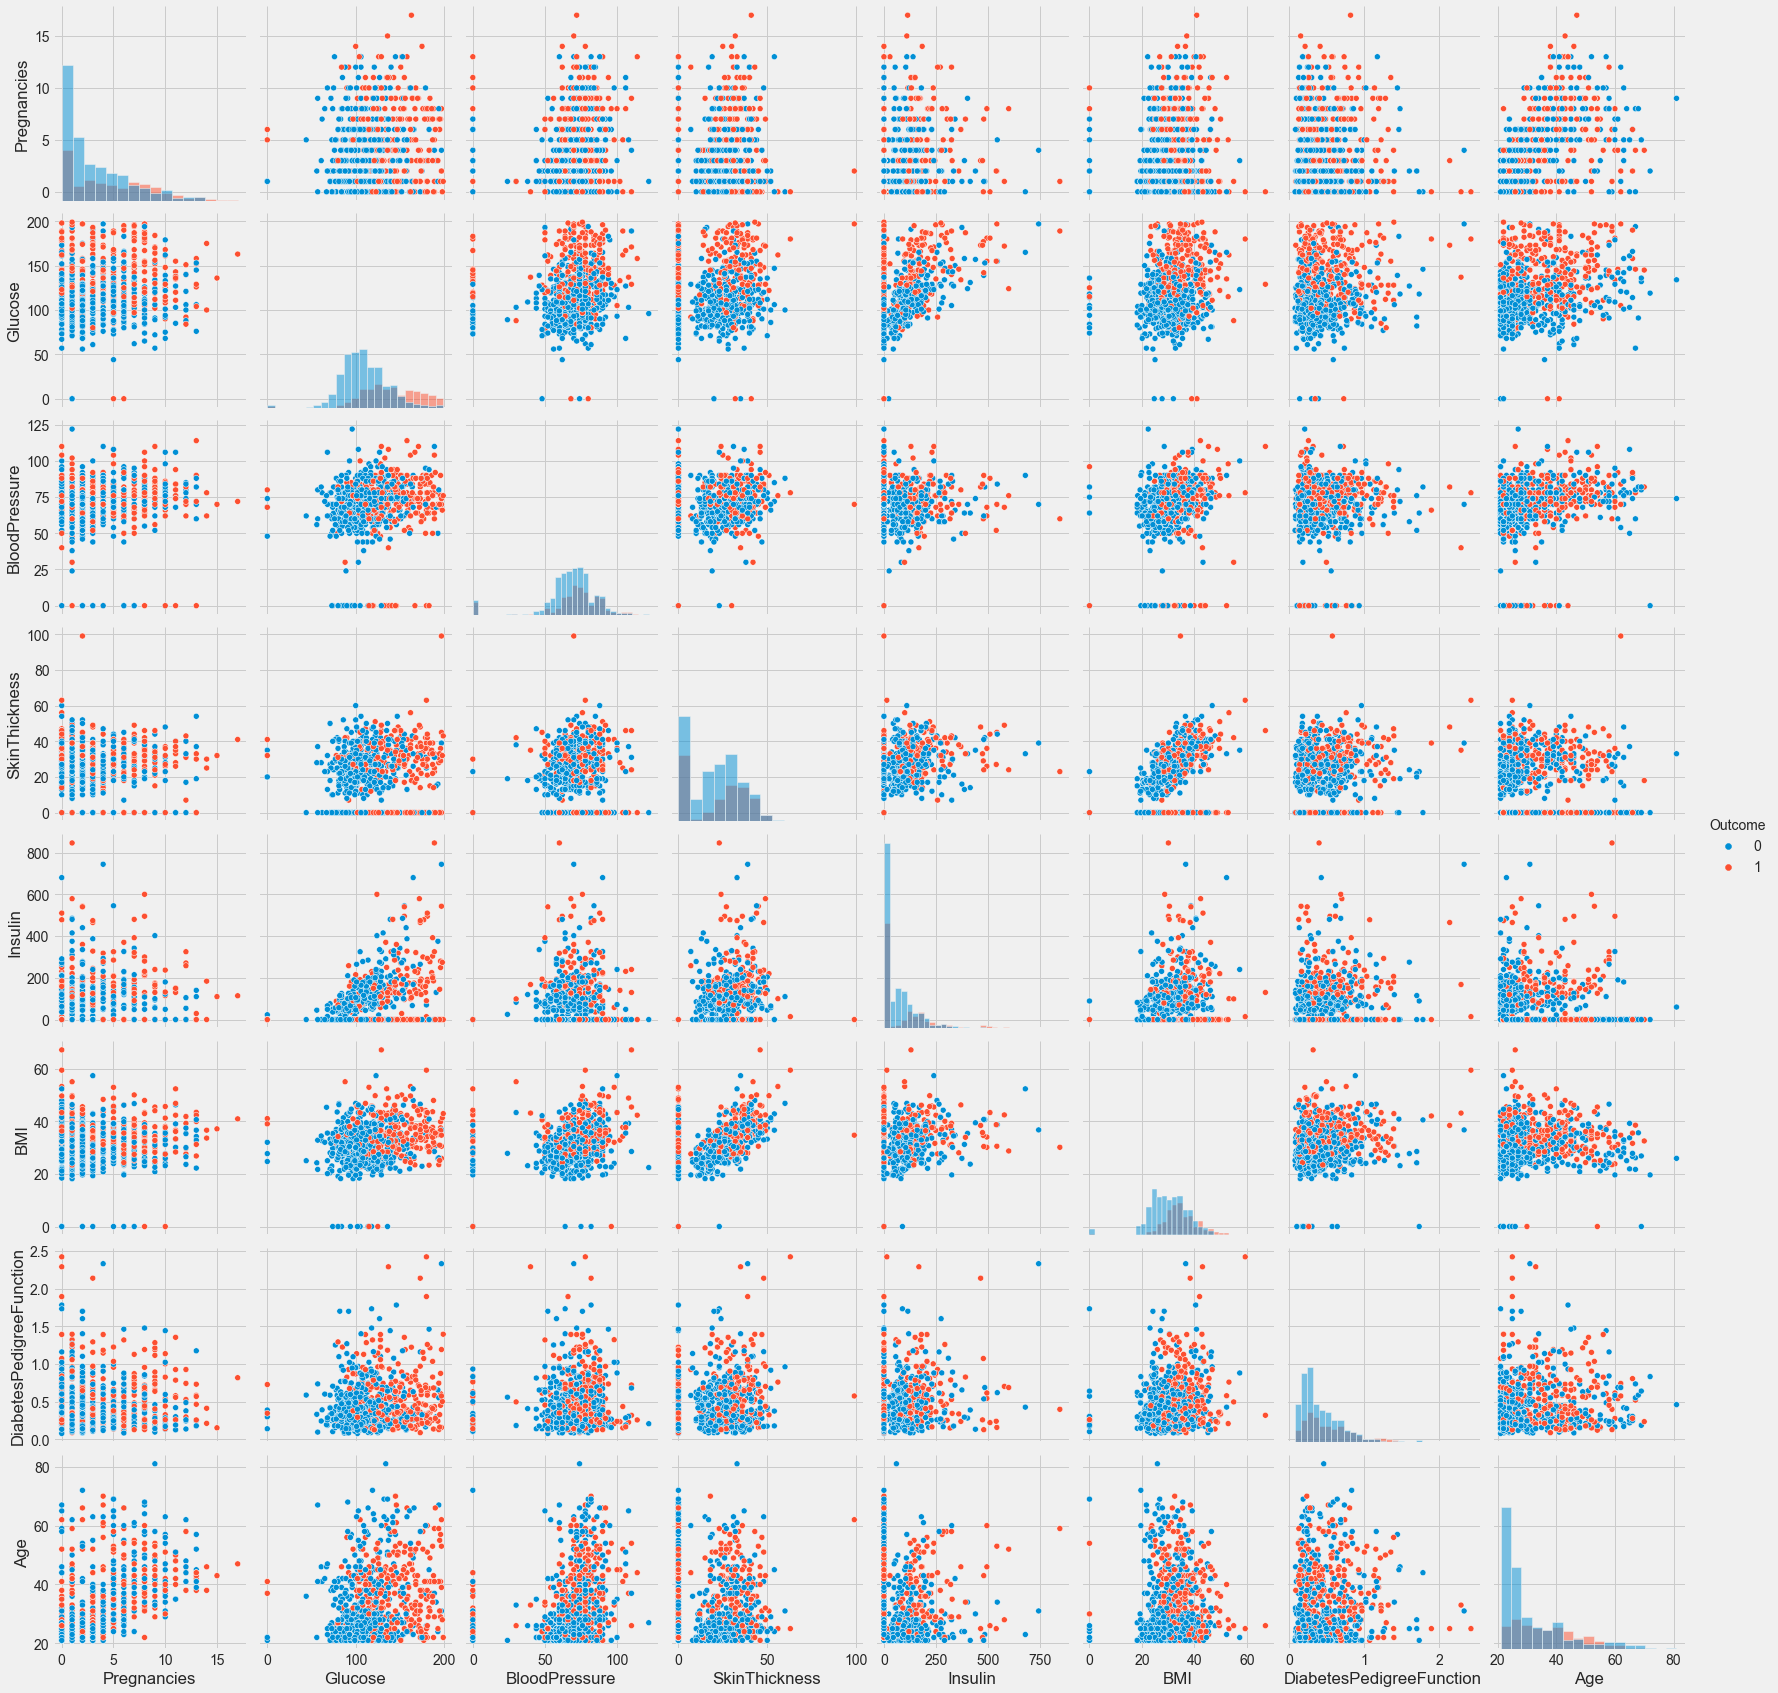

In [15]:
plt.figure(figsize=(30, 30))
sns.pairplot(df, hue='Outcome', height=3, diag_kind='hist')

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


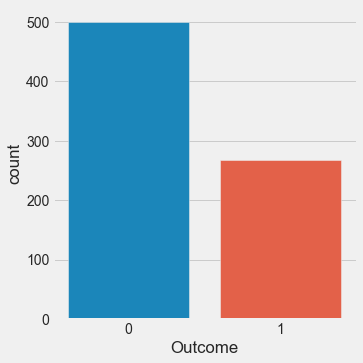

In [16]:
# Let's first check gender
sns.catplot('Outcome', data=df, kind='count')

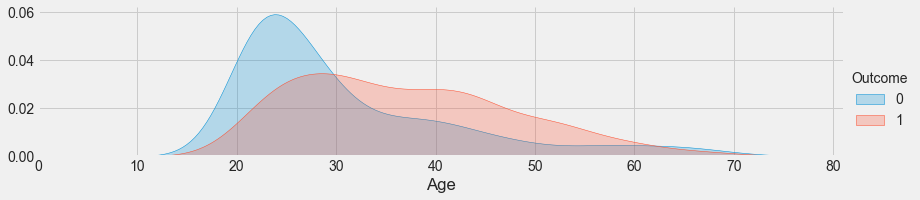

In [17]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

fig = sns.FacetGrid(df, hue="Outcome", aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = df['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

# 2. Data Pre-Processing

In [18]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [19]:
# How many missing zeros are mising in each feature
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for column in feature_columns:
    print("============================================")
    print(f"{column} ==> Missing values : {len(df.loc[df[column] == 0])}")

Pregnancies ==> Missing values : 111
Glucose ==> Missing values : 5
BloodPressure ==> Missing values : 35
SkinThickness ==> Missing values : 227
Insulin ==> Missing values : 374
BMI ==> Missing values : 11
DiabetesPedigreeFunction ==> Missing values : 0
Age ==> Missing values : 0


In [20]:
from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values=0, strategy="mean", copy=False)

df[feature_columns] = fill_values.fit_transform(df[feature_columns])

In [21]:
for column in feature_columns:
    print("============================================")
    print(f"{column} ==> Missing values : {len(df.loc[df[column] == 0])}")

Pregnancies ==> Missing values : 0
Glucose ==> Missing values : 0
BloodPressure ==> Missing values : 0
SkinThickness ==> Missing values : 0
Insulin ==> Missing values : 0
BMI ==> Missing values : 0
DiabetesPedigreeFunction ==> Missing values : 0
Age ==> Missing values : 0


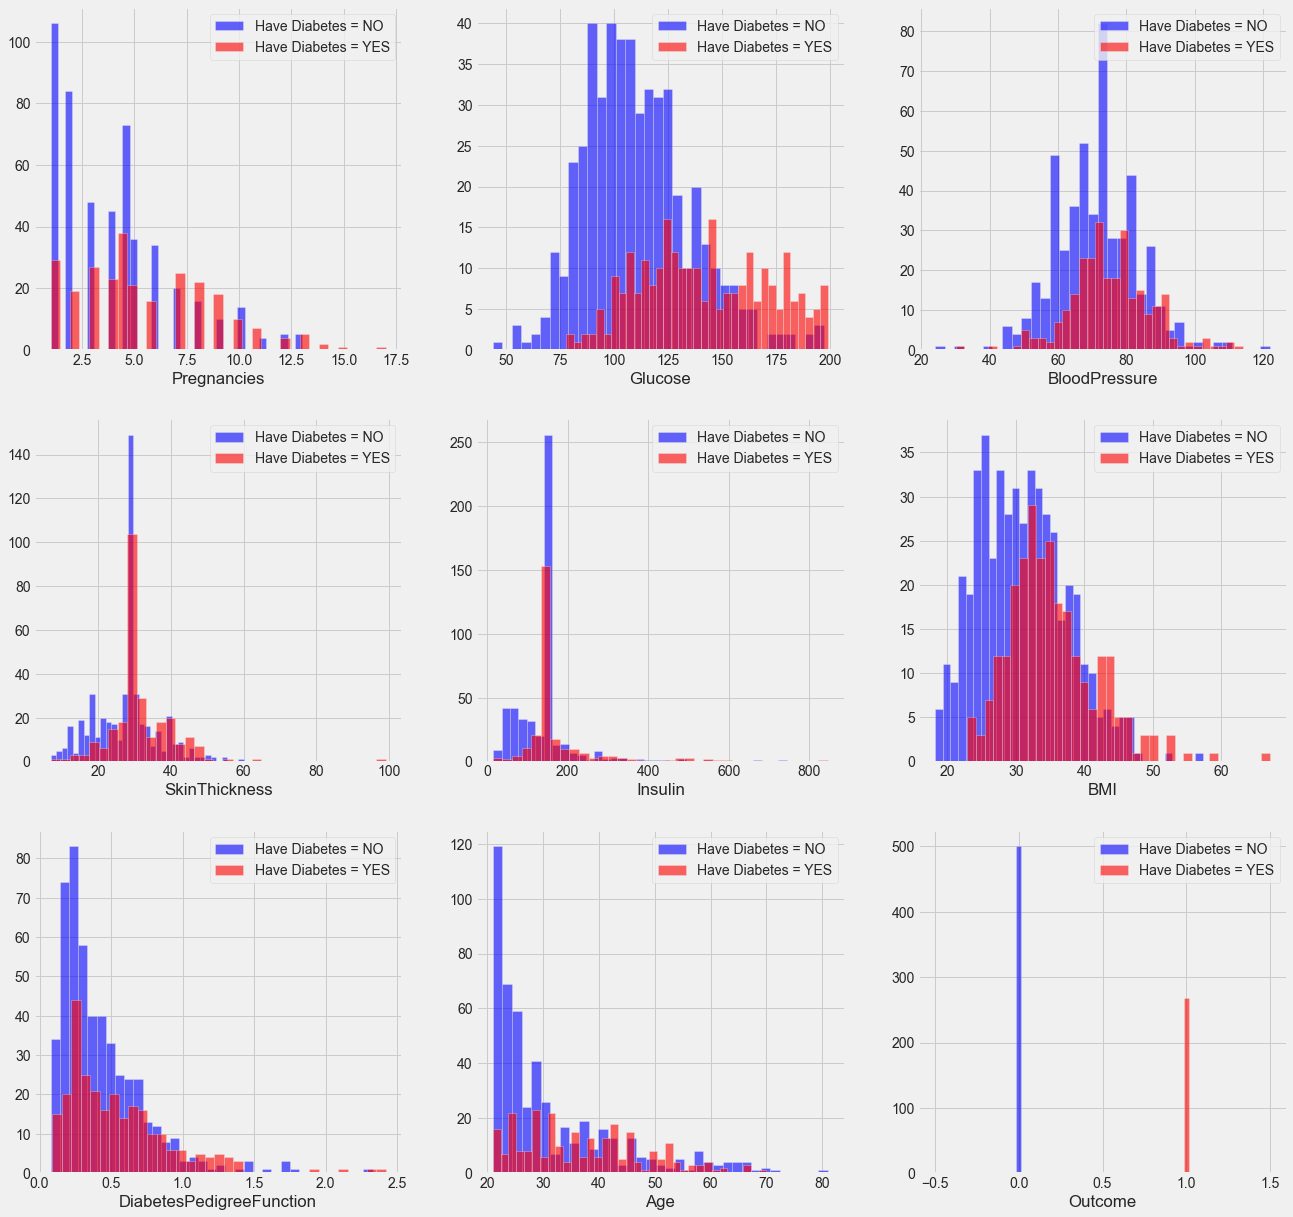

In [22]:
# Visulazing the distibution of the data for every feature
plt.figure(figsize=(20, 20))

for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    df[df["Outcome"] == 0][column].hist(bins=35, color='blue', label='Have Diabetes = NO', alpha=0.6)
    df[df["Outcome"] == 1][column].hist(bins=35, color='red', label='Have Diabetes = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [23]:
from sklearn.model_selection import train_test_split


X = df[feature_columns]
y = df.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

# 3. Bagging Algorithms
Bootstrap Aggregation or bagging involves taking multiple samples from your training dataset (with replacement) and training a model for each sample.

The final output prediction is averaged across the predictions of all of the sub-models.

The three bagging models covered in this section are as follows:

1. Bagged Decision Trees
2. Random Forest
3. Extra Trees

## 3. 1. Bagged Decision Trees
Bagging performs best with algorithms that have high variance. A popular example are decision trees, often constructed without pruning.

**BaggingClassifier**:

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

This algorithm encompasses several works from the literature. When random subsets of the dataset are drawn as random subsets of the samples, then this algorithm is known as Pasting. If samples are drawn with replacement, then the method is known as Bagging. When random subsets of the dataset are drawn as random subsets of the features, then the method is known as Random Subspaces. Finally, when base estimators are built on subsets of both samples and features, then the method is known as Random Patches.

**BaggingClassifier Parameters:**
- `base_estimator` : The base estimator to fit on random subsets of the dataset. If None, then the base estimator is a decision tree.
***
- `n_estimators` : The number of base estimators in the ensemble.
***
- `max_samples` : The number of samples to draw from X to train each base estimator.
***
- `max_features` : The number of features to draw from X to train each base estimator.
***
- `bootstrap` : Whether samples are drawn with replacement. If False, sampling without replacement is performed.
***
- `bootstrap_features` : Whether features are drawn with replacement.
***
- `oob_score` : Whether to use out-of-bag samples to estimate the generalization error.
***
- `warm_start` : When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new ensemble.

In [25]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=1500, random_state=42, n_jobs=-1)
bagging_clf.fit(X_train, y_train)

evaluate(bagging_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[349   0]
 [  0 188]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   349.00 188.00      1.00     537.00        537.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[119  32]
 [ 24  56]]
ACCURACY SCORE:
0.7576
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.83  0.64      0.76       0.73          0.76
recall      0.79  0.70      0.76       0.74          0.76
f1-score    0.81  0.67      0.76       0.74          0.76
support   151.00 80.00      0.76     231.00        231.00


In [26]:
scores = {
    'Bagging Classifier': {
        'Train': accuracy_score(y_train, bagging_clf.predict(X_train)),
        'Test': accuracy_score(y_test, bagging_clf.predict(X_test)),
    },
}

In [27]:
scores

{'Bagging Classifier': {'Train': 1.0, 'Test': 0.7575757575757576}}

## 3. 2. Random Forest

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if `bootstrap=True` (default).

- **Random forest algorithm parameters:**
- `n_estimators`: The number of trees in the forest.
*** 
- `criterion`: The function to measure the quality of a split. Supported criteria are "`gini`" for the Gini impurity and "`entropy`" for the information gain.
***
- `max_depth`: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than `min_samples_split` samples.
***
- `min_samples_split`: The minimum number of samples required to split an internal node.
***
- `min_samples_leaf`: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least ``min_samples_leaf`` training samples in each of the left and right branches.  This may have the effect of smoothing the model, especially in regression.
***
- `min_weight_fraction_leaf`: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
***
- `max_features`: The number of features to consider when looking for the best split.
***
- `max_leaf_nodes`: Grow a tree with ``max_leaf_nodes`` in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
***
- `min_impurity_decrease`: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
***
- `min_impurity_split`: Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.
***
- `bootstrap`: Whether bootstrap samples are used when building trees. If False, the whole datset is used to build each tree.
***
- `oob_score`: Whether to use out-of-bag samples to estimate the generalization accuracy.
***
- `warm_start` : When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new ensemble.

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_estimators=1000, n_jobs=-1)
rf_clf.fit(X_train, y_train)
evaluate(rf_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[349   0]
 [  0 188]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   349.00 188.00      1.00     537.00        537.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[123  28]
 [ 29  51]]
ACCURACY SCORE:
0.7532
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.81  0.65      0.75       0.73          0.75
recall      0.81  0.64      0.75       0.73          0.75
f1-score    0.81  0.64      0.75       0.73          0.75
support   151.00 80.00      0.75     231.00        231.00


In [29]:
scores['Random Forest'] = {
        'Train': accuracy_score(y_train, rf_clf.predict(X_train)),
        'Test': accuracy_score(y_test, rf_clf.predict(X_test)),
    }

## 3. 3. Extra Trees
Extra Trees are another modification of bagging where random trees are constructed from samples of the training dataset.

You can construct an Extra Trees model for classification using the ExtraTreesClassifier class.

**ExtraTreeClassifier**:

This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

**ExtraTreeClassifier Parameters**:
- `n_estimators`: The number of trees in the forest.
*** 
- `criterion`: The function to measure the quality of a split. Supported criteria are "`gini`" for the Gini impurity and "`entropy`" for the information gain.
***
- `max_depth`: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than `min_samples_split` samples.
***
- `min_samples_split`: The minimum number of samples required to split an internal node.
***
- `min_samples_leaf`: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least ``min_samples_leaf`` training samples in each of the left and right branches.  This may have the effect of smoothing the model, especially in regression.
***
- `min_weight_fraction_leaf`: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
***
- `max_features`: The number of features to consider when looking for the best split.
***
- `max_leaf_nodes`: Grow a tree with ``max_leaf_nodes`` in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
***
- `min_impurity_decrease`: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
***
- `min_impurity_split`: Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.
***
- `bootstrap`: Whether bootstrap samples are used when building trees. If False, the whole datset is used to build each tree.
***
- `oob_score`: Whether to use out-of-bag samples to estimate the generalization accuracy.
***
- `warm_start` : When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new ensemble.

In [30]:
from sklearn.ensemble import ExtraTreesClassifier

ex_tree_clf = ExtraTreesClassifier(n_estimators=1000, max_features=7, random_state=42)
ex_tree_clf.fit(X_train, y_train)
evaluate(ex_tree_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[349   0]
 [  0 188]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   1.00   1.00      1.00       1.00          1.00
recall      1.00   1.00      1.00       1.00          1.00
f1-score    1.00   1.00      1.00       1.00          1.00
support   349.00 188.00      1.00     537.00        537.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[124  27]
 [ 25  55]]
ACCURACY SCORE:
0.7749
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.83  0.67      0.77       0.75          0.78
recall      0.82  0.69      0.77       0.75          0.77
f1-score    0.83  0.68      0.77       0.75          0.78
support   151.00 80.00      0.77     231.00        231.00


In [31]:
scores['Extra Tree'] = {
        'Train': accuracy_score(y_train, ex_tree_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ex_tree_clf.predict(X_test)),
    }

# 4. Boosting Algorithms
Boosting ensemble algorithms creates a sequence of models that attempt to correct the mistakes of the models before them in the sequence.

Once created, the models make predictions which may be weighted by their demonstrated accuracy and the results are combined to create a final output prediction.

The two most common boosting ensemble machine learning algorithms are:

1. AdaBoost
2. Stochastic Gradient Boosting
***

## 4. 1. AdaBoost
AdaBoost was perhaps the first successful boosting ensemble algorithm. It generally works by weighting instances in the dataset by how easy or difficult they are to classify, allowing the algorithm to pay or or less attention to them in the construction of subsequent models.

You can construct an AdaBoost model for classification using the AdaBoostClassifier class.

**AdaBoostClassifier**:

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

**AdaBoostClassifier Params**:
- `base_estimator` : The base estimator from which the boosted ensemble is built.
***
- `n_estimators` : The maximum number of estimators at which boosting is terminated. In case of perfect fit, the learning procedure is stopped early.
***
- `learning_rate` : Learning rate shrinks the contribution of each classifier by ``learning_rate``. There is a trade-off between ``learning_rate`` and ``n_estimators``.
***
- `algorithm` : If 'SAMME.R' then use the SAMME.R real boosting algorithm. ``base_estimator`` must support calculation of class probabilities. If 'SAMME' then use the SAMME discrete boosting algorithm. The SAMME.R algorithm typically converges faster than SAMME, achieving a lower test error with fewer boosting iterations.

In [32]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=30)
ada_boost_clf.fit(X_train, y_train)
evaluate(ada_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[310  39]
 [ 51 137]]
ACCURACY SCORE:
0.8324
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.86   0.78      0.83       0.82          0.83
recall      0.89   0.73      0.83       0.81          0.83
f1-score    0.87   0.75      0.83       0.81          0.83
support   349.00 188.00      0.83     537.00        537.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[123  28]
 [ 27  53]]
ACCURACY SCORE:
0.7619
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.82  0.65      0.76       0.74          0.76
recall      0.81  0.66      0.76       0.74          0.76
f1-score    0.82  0.66      0.76       0.74          0.76
support   151.00 80.00      0.76     231.00        231.00


In [33]:
scores['AdaBoost'] = {
        'Train': accuracy_score(y_train, ada_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, ada_boost_clf.predict(X_test)),
    }

## 4. 2. Stochastic Gradient Boosting
Stochastic Gradient Boosting (also called Gradient Boosting Machines) are one of the most sophisticated ensemble techniques. It is also a technique that is proving to be perhaps of the the best techniques available for improving performance via ensembles.

**GradientBoostingClassifier**:

GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage ``n_classes_`` regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function. Binary classification is a special case where only a single regression tree is induced.

**GradientBoostingClassifier Parameters**:

- `loss` : loss function to be optimized. 'deviance' refers to deviance (= logistic regression) for classification with probabilistic outputs. For loss 'exponential' gradient boosting recovers the AdaBoost algorithm.
***
- `learning_rate` : learning rate shrinks the contribution of each tree by `learning_rate`. There is a trade-off between learning_rate and n_estimators.
***
- `n_estimators` : The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
***
- `subsample` : The fraction of samples to be used for fitting the individual base learners. If smaller than 1.0 this results in Stochastic Gradient Boosting. `subsample` interacts with the parameter `n_estimators`. Choosing `subsample < 1.0` leads to a reduction of variance and an increase in bias.
***
- `criterion` : The function to measure the quality of a split. Supported criteria are "friedman_mse" for the mean squared error with improvement score by Friedman, "mse" for mean squared error, and "mae" for the mean absolute error. The default value of "friedman_mse" is generally the best as it can provide a better approximation in some cases.
***
- `min_samples_split`: The minimum number of samples required to split an internal node.
***
- `min_samples_leaf`: The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least ``min_samples_leaf`` training samples in each of the left and right branches.  This may have the effect of smoothing the model, especially in regression.
***
- `min_weight_fraction_leaf`: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
***
- `max_depth`: maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.
***
- `min_impurity_decrease`: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.
***
- `min_impurity_split`: Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.
***
- `max_features`: The number of features to consider when looking for the best split.
***
- `max_leaf_nodes`: Grow trees with ``max_leaf_nodes`` in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
***
- `warm_start`: When set to ``True``, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just erase the previous solution.
***
- `validation_fraction`: The proportion of training data to set aside as validation set for early stopping. Must be between 0 and 1. Only used if ``n_iter_no_change`` is set to an integer.
***
- `n_iter_no_change`: used to decide if early stopping will be used to terminate training when validation score is not improving. By default it is set to None to disable early stopping. If set to a number, it will set aside ``validation_fraction`` size of the training data as validation and terminate training when validation score is not improving in all of the previous ``n_iter_no_change`` numbers of iterations. The split is stratified.
***
- `tol`: Tolerance for the early stopping. When the loss is not improving by at least tol for ``n_iter_no_change`` iterations (if set to a number), the training stops.
***
- `ccp_alpha`: Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ``ccp_alpha`` will be chosen.
***

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad_boost_clf.fit(X_train, y_train)
evaluate(grad_boost_clf, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[342   7]
 [ 19 169]]
ACCURACY SCORE:
0.9516
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.95   0.96      0.95       0.95          0.95
recall      0.98   0.90      0.95       0.94          0.95
f1-score    0.96   0.93      0.95       0.95          0.95
support   349.00 188.00      0.95     537.00        537.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[116  35]
 [ 26  54]]
ACCURACY SCORE:
0.7359
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.82  0.61      0.74       0.71          0.74
recall      0.77  0.68      0.74       0.72          0.74
f1-score    0.79  0.64      0.74       0.72          0.74
support   151.00 80.00      0.74     231.00        231.00


In [35]:
scores['Gradient Boosting'] = {
        'Train': accuracy_score(y_train, grad_boost_clf.predict(X_train)),
        'Test': accuracy_score(y_test, grad_boost_clf.predict(X_test)),
    }

# 5. Voting Ensemble

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

The predictions of the sub-models can be weighted, but specifying the weights for classifiers manually or even heuristically is difficult. More advanced methods can learn how to best weight the predictions from submodels, but this is called stacking (stacked generalization) and is currently not provided in scikit-learn.

**VotingClassifier** : 
- `estimators` : Invoking the ``fit`` method on the ``VotingClassifier`` will fit clones of those original estimators that will be stored in the class attribute ``self.estimators_``.
***
- `voting` : If 'hard', uses predicted class labels for majority rule voting. Else if 'soft', predicts the class label based on the argmax of the sums of the predicted probabilities, which is recommended for an ensemble of well-calibrated classifiers.
***

In [36]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

estimators = []
log_reg = LogisticRegression(solver='liblinear')
estimators.append(('Logistic', log_reg))

tree = DecisionTreeClassifier()
estimators.append(('Tree', tree))

svm_clf = SVC(gamma='scale')
estimators.append(('SVM', svm_clf))

voting = VotingClassifier(estimators=estimators)
voting.fit(X_train, y_train)

evaluate(voting, X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[327  22]
 [ 82 106]]
ACCURACY SCORE:
0.8063
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision   0.80   0.83      0.81       0.81          0.81
recall      0.94   0.56      0.81       0.75          0.81
f1-score    0.86   0.67      0.81       0.77          0.80
support   349.00 188.00      0.81     537.00        537.00
TESTING RESULTS: 
CONFUSION MATRIX:
[[130  21]
 [ 37  43]]
ACCURACY SCORE:
0.7489
CLASSIFICATION REPORT:
               0     1  accuracy  macro avg  weighted avg
precision   0.78  0.67      0.75       0.73          0.74
recall      0.86  0.54      0.75       0.70          0.75
f1-score    0.82  0.60      0.75       0.71          0.74
support   151.00 80.00      0.75     231.00        231.00


In [37]:
scores['Voting'] = {
        'Train': accuracy_score(y_train, voting.predict(X_train)),
        'Test': accuracy_score(y_test, voting.predict(X_test)),
    }

<AxesSubplot:>

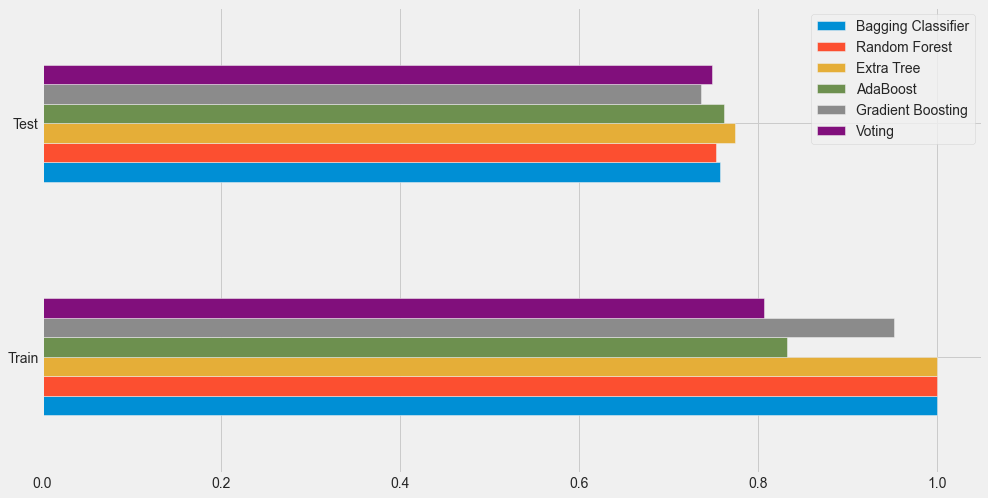

In [38]:
scores_df = pd.DataFrame(scores)

scores_df.plot(kind='barh', figsize=(15, 8))

## Summary
In this notebook we discovered ensemble machine learning algorithms for improving the performance of models on your problems.

You learned about:

1. Bagging Ensembles including Bagged Decision Trees, Random Forest and Extra Trees.
2. Boosting Ensembles including AdaBoost and Stochastic Gradient Boosting.
3. Voting Ensembles for averaging the predictions for any arbitrary models.

## References:
- [Bagging and Random Forest Ensemble Algorithms for Machine Learning](https://machinelearningmastery.com/bagging-and-random-forest-ensemble-algorithms-for-machine-learning/)
- [Ensemble Machine Learning Algorithms in Python with scikit-learn](https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/)
[Scikit-learn Library](https://scikit-learn.org/stable/)